# ML Project

In [18]:
# import libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [19]:
# import data from seaborn library
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [20]:
# create a folder inside ml_project for your data
os.makedirs('./data', exist_ok=True)

In [21]:
# save the data as csv file inside the data folder
df.to_csv('./data/tips.csv', index=False)

In [22]:
# split the data into X and y
X = df.drop('tip', axis=1) # features
y = df['tip'] # target

In [23]:
X.head()

,total_bill,sex,smoker,day,time,size
0,16.99,Female,No,Sun,Dinner,2
1,10.34,Male,No,Sun,Dinner,3
2,21.01,Male,No,Sun,Dinner,3
3,23.68,Male,No,Sun,Dinner,2
4,24.59,Female,No,Sun,Dinner,4


In [24]:
# feature encoding using sklearn method label encoder
le = LabelEncoder()
# encode sex, smoker, day and time
X["sex"] = le.fit_transform(X["sex"])
X["smoker"] = le.fit_transform(X["smoker"])
X["day"] = le.fit_transform(X["day"])
X["time"] = le.fit_transform(X["time"])

X.head()

,total_bill,sex,smoker,day,time,size
0,16.99,0,0,2,0,2
1,10.34,1,0,2,0,3
2,21.01,1,0,2,0,3
3,23.68,1,0,2,0,2
4,24.59,0,0,2,0,4


In [25]:
# split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
# training a model RF

# call the model
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
# fit the models
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [27]:
# training a model xgboost
from xgboost import XGBRegressor

# call the model
xgb_model = XGBRegressor()
# fit the models
xgb_model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


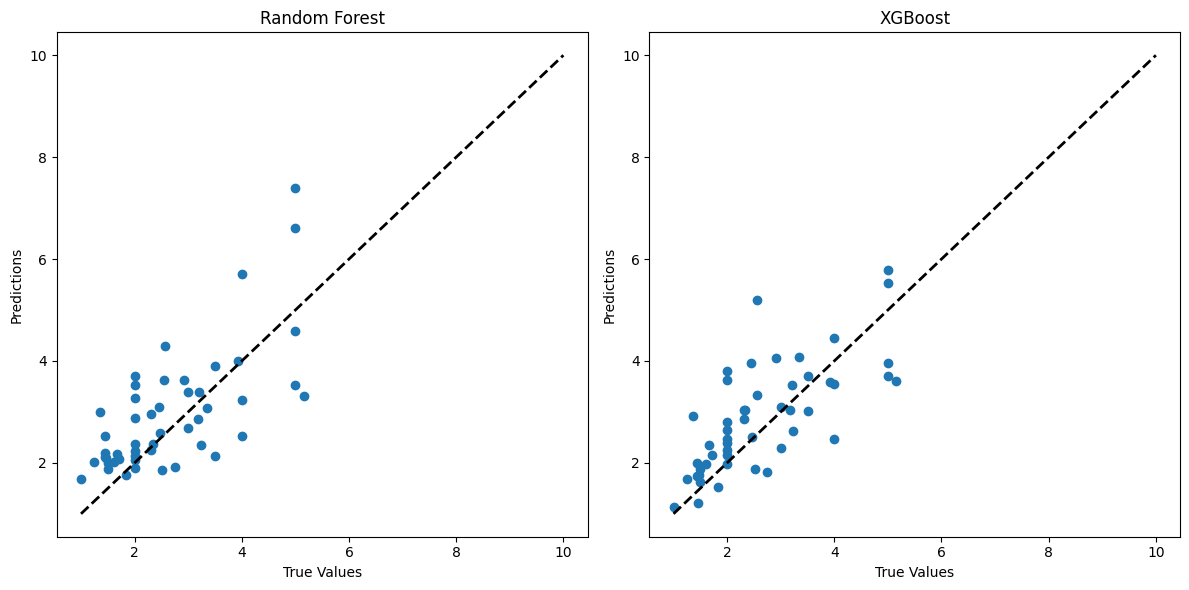

In [28]:
# predicting with the models
rf_predictions = rf_model.predict(X_test)
xgb_predictions = xgb_model.predict(X_test)

# plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, rf_predictions)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Random Forest')

plt.subplot(1, 2, 2)
plt.scatter(y_test, xgb_predictions)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('XGBoost')

plt.tight_layout()
plt.show()

In [29]:
# validate the models based on metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Random Forest
print("Random Forest")
print("MAE:", mean_absolute_error(y_test, rf_predictions))
print("MSE:", mean_squared_error(y_test, rf_predictions))
print("R2:", r2_score(y_test, rf_predictions))

# XGBoost
print("XGBoost")
print("MAE:", mean_absolute_error(y_test, xgb_predictions))
print("MSE:", mean_squared_error(y_test, xgb_predictions))
print("R2:", r2_score(y_test, xgb_predictions))

Random Forest
MAE: 0.7568040816326534
MSE: 0.9124723914285727
R2: 0.27000535261916114
XGBoost
MAE: 0.6721697168934103
MSE: 0.7389215578875857
R2: 0.40884920227805865


In [30]:
# we will move forward with XGBoost

# save the model
import joblib
# creata folder named models
if not os.path.exists('./models'):
    os.makedirs('./models')

joblib.dump(xgb_model, './models/xgb_model.pkl')

['./models/xgb_model.pkl']

## Prediction

In [31]:
# check the prediction from model
X.head()

,total_bill,sex,smoker,day,time,size
0,16.99,0,0,2,0,2
1,10.34,1,0,2,0,3
2,21.01,1,0,2,0,3
3,23.68,1,0,2,0,2
4,24.59,0,0,2,0,4


In [35]:
# predict specific value
xgb_model.predict([[5,1,0,3,1,4]])

array([2.2035213], dtype=float32)